# HOMEWORK 5

In this homework you are going to implement the **Floyd-Steinberg dithering** algorithm. Dithering, in general, means that we are adding noise to the signal (in our case digital image) in order to perceive it better. In other words, by adding the noise the objective quality will be worse but the subjective quality will be better (i.e. the image will "look" better).

The details of FS dithering can be found in this [wiki](https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering) page. In order to implement the dithering, we will implement the following steps:
* Define colour pallette
* Quantize the image to obtain the baseline and compute the average quantization error
* Implement FS dithering and compute the average quantization error

You will also have to answer the question at the end of this notebook.

Note: In this homework, you will have the chance to earn some extra points. See the "Bonus" section at the end of the notebook. Good luck!

As always, you are encouraged to use your own images :-)

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [25, 15]

Let's load the image.

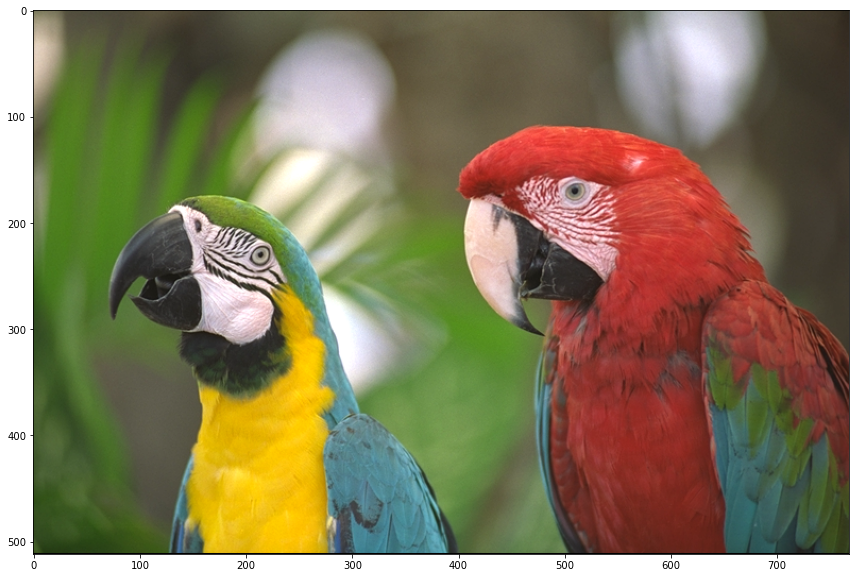

In [2]:
# Load image
img = cv2.imread('../data/kodim23.png')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

Let's start with gray tones first.

In [16]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

Using the colour pallette, let's quantize the original image.

In [17]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dists = [math.sqrt((pixel[0] - color[0])**2 + (pixel[1] - color[1])**2 + (pixel[2] - color[2])**2) for color in colors]
        new_pixel = colors[dists.index(min(dists))]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

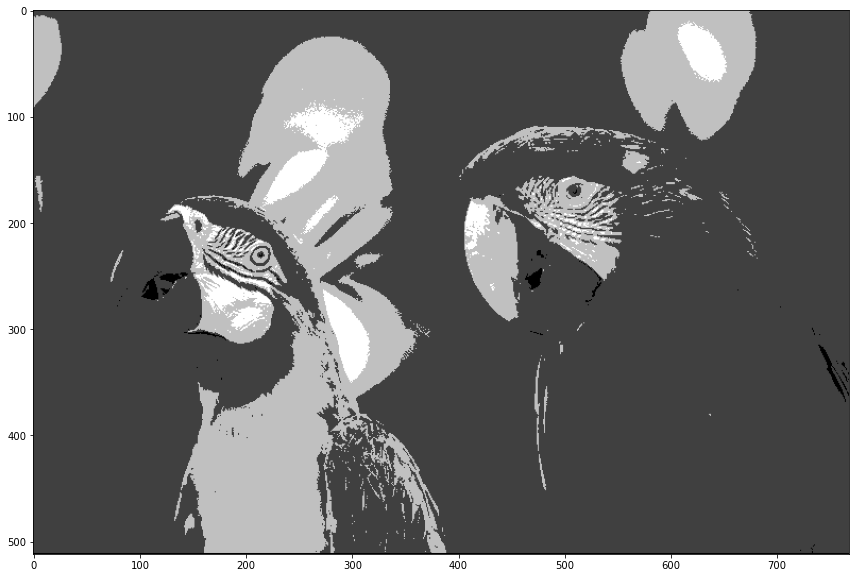

In [18]:
# Show quantized image (don't forget to cast back to uint8)
plt.imshow(quantized.astype(np.uint8))

In [19]:
# Compute average quantization error
error = img - quantized
avg_quant_error = np.mean(np.square(error))
avg_quant_error

2140.2979

#### Floyd-Steinberg Dithering
We are now going to implement the FS dithering and compare it to the optimally quantized image we have calculated above.

In [20]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = img_tmp[r, c, :]
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        dists = [math.sqrt((pixel[0] - color[0])**2 + (pixel[1] - color[1])**2 + (pixel[2] - color[2])**2) for color in colors]
        new_pixel = colors[dists.index(min(dists))]      
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 7/16
        img_tmp[r+1, c-1, :] = img_tmp[r+1, c-1, :] + quant_error * 3/16
        img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 5/16
        img_tmp[r+1, c+1, :] = img_tmp[r+1, c+1, :] + quant_error / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x169ddb3d0>)

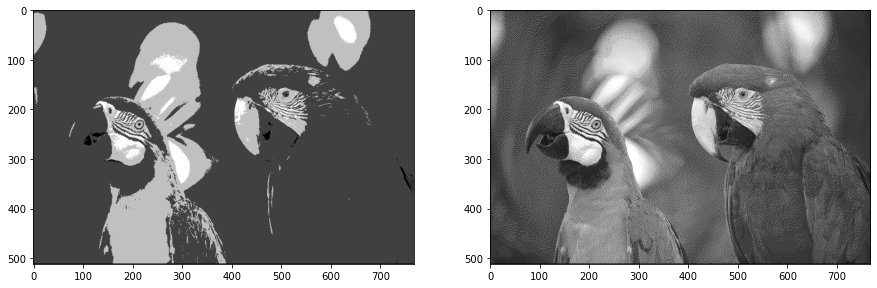

In [21]:
# Show quantized image (don't forget to cast back to uint8)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))   # optimally quantized
plt.subplot(122), plt.imshow(dithering.astype(np.uint8))   # dithering

In [22]:
# Compute average quantization error for dithered image
error = img - dithering
avg_dith_error = np.mean(np.square(error))
avg_dith_error

3303.3276

### Questions
* Which image has higher quantization error? Optimally quantized or dithered?
    * <span style="color:red">Dithered image has higher quantization error</span>
* Which image looks better to you?
    * <span style="color:red">Dithered image looks way better</span>
* Can you repeat the same process using only two colours: black and white? Show me :-)
    * <span style="color:red">See the last image :)</span>

### Bonus Points

Repeat the homework using a diffrerent image pallette. For instance, you can use an optimal colour
pallette that we can calculate via k-means algorithm. The following snippet of code will give you the 16
optimal colours for your original image.

In [10]:
def quantize(img, pallette):
    # Cast the image to float
    img = img.astype(np.float32)

    # Prepare for quantization
    rows, cols, channels = img.shape
    quantized = np.zeros_like(img)

    # Apply quantization
    for r in range(rows):
        for c in range(cols):
            # Extract the original pixel value
            pixel = img[r, c, :]

            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            dists = [math.sqrt((pixel[0] - color)**2 + (pixel[1] - color)**2 + (pixel[2] - color)**2) for color in pallette]
            new_pixel = colors[dists.index(min(dists))]

            # Apply quantization
            quantized[r, c, :] = new_pixel
            
    return quantized

In [11]:
def dither(img, pallette):
    img_tmp = np.copy(img)
    dithering = np.zeros_like(img)

    for r in range(1, rows-1):
        for c in range(1, cols-1):
            # Extract the original pixel value
            pixel = img_tmp[r, c, :]
            # Find the closest colour from the pallette (using absolute value/Euclidean distance)
            # Note: You may need more than one line of code here
            dists = [math.sqrt((pixel[0] - color)**2 + (pixel[1] - color)**2 + (pixel[2] - color)**2) for color in pallette]
            new_pixel = colors[dists.index(min(dists))]      

            # Compute quantization error
            quant_error = pixel - new_pixel

            # Diffuse the quantization error accroding to the FS diffusion matrix
            # Note: You may need more than one line of code here
            img_tmp[r, c+1, :] = img_tmp[r, c+1, :] + quant_error * 7/16
            img_tmp[r+1, c-1, :] = img_tmp[r+1, c-1, :] + quant_error * 3/16
            img_tmp[r+1, c, :] = img_tmp[r+1, c, :] + quant_error * 5/16
            img_tmp[r+1, c+1, :] = img_tmp[r+1, c+1, :] + quant_error / 16

            # Apply dithering
            dithering[r, c, :] = new_pixel
            
    return dithering

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x166652fa0>)

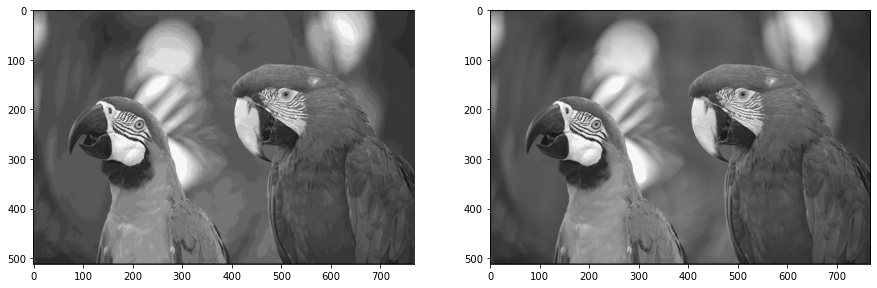

In [12]:
# 16 colors
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

quantized = quantize(img, colors)
dithered = dither(img, colors)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x169cfbeb0>)

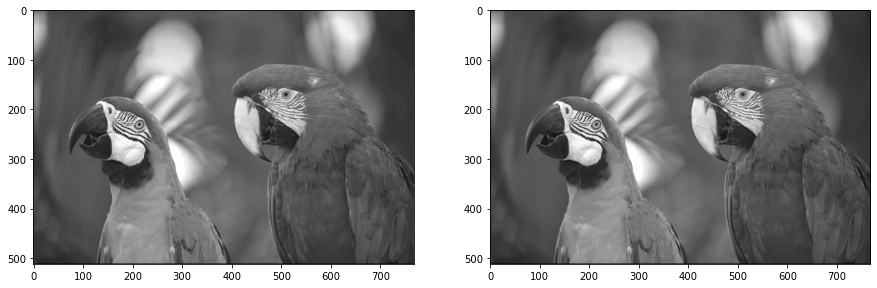

In [13]:
# 32 colors
kmeans = KMeans(n_clusters=32).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

quantized = quantize(img, colors)
dithered = dither(img, colors)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))

In [ ]:
# 256 colors
kmeans = KMeans(n_clusters=256).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_

quantized = quantize(img, colors)
dithered = dither(img, colors)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1664fc580>)

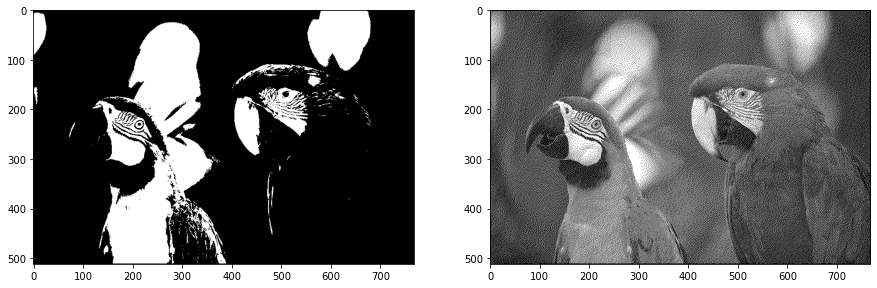

In [15]:
# 2 colors (black and white)
colors = [0, 255]

quantized = quantize(img, colors)
dithered = dither(img, colors)
plt.subplot(121), plt.imshow(quantized.astype(np.uint8))
plt.subplot(122), plt.imshow(dithered.astype(np.uint8))

Apply FS dithering the same way you did before.
* How does the result look like to you?
    * <span style="color:red">With 16 colors pallette dithered image looks smoother than quantized one</span>
* What happens if we use 32 colours?
    * <span style="color:red">I don't see any difference between quantized and dithered images for pallette with 32 colors</span>
* And what happens if we use 256 colours?
    * <span style="color:red">My implementation takes too long. I suspect the result would be similar to pallette with 32 colors</span>